Importing necessary libraries

In [ ]:
import numpy as np # For numerical calculations
import pandas as pd # For creating data frame
import matplotlib.pyplot as plt # For data Visualization
import seaborn as sb # For data Visualization
from sklearn import preprocessing # For data preprocessing
from sklearn.preprocessing import LabelEncoder # For converting categoical values to numerical
from sklearn.preprocessing import StandardScaler,MinMaxScaler # For feature scaling
from sklearn.linear_model import LogisticRegression # Algorithm for creating model
from sklearn.model_selection import train_test_split # Splitting of the data
from sklearn.metrics import f1_score # For calculating f1-score
from sklearn.metrics import precision_score # For calculating pecision_score
from sklearn.metrics import mean_squared_error # For calculating MSE
from sklearn.metrics import mean_absolute_error # For calculating MAE
import plotly.graph_objs as go
import plotly as py

import warnings
warnings.simplefilter(action='ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%cd /content/drive/My Drive/Python_CSV files/

/content/drive/My Drive/Python_CSV files


Loading The Dataset

In [ ]:
df=pd.read_csv("DS3_C6_S3_MallCustomers_Data_Project.csv") # Used for reading  the csv file

In [ ]:
df.head() # Retrieves the first 5 rows from the dataframe

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.shape # Used for checking the number of rows and columns in the dataframe

(200, 5)

In [ ]:
df.dtypes # Used for checking the datatypes of attributes in the dataframe

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [ ]:
df.columns # Used for checking the columns in the dataframe

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
df.info # Used to check the information of whole dataframe.

<bound method DataFrame.info of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

Checking For missing values in the dataset

In [ ]:
df.isnull().sum() # Used for checking the null values in the dataset

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Interpretation:

Here we found that dataset contains no missing values.

In [ ]:
df.describe() # Used to get mean,meadian,mode,max,min of all numerical data

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


1.1)Univariate Analysis:

Univariate Analysis on categorical columns

In [ ]:
def info_of_cat(col): 
    print(f"Unique values in {col} are: {df[col].unique()}") # unique: returns the unique values in the col
    print(f"Mode of {col} is {df[col].mode()[0]}")  # mode: returns the mode of the column
    print(f"Number of missing values in {col} is {df[col].isnull().sum()}") # isnull().sum() counts the number of null in dataframe
    if df[col].isnull().sum() > 0:  # check if null values are present
        print(f"\nThere are null values in the {col} column")

Analysis of Gender

In [ ]:
info_of_cat("Gender") #function returns all the information required for the level 1 analysis

Unique values in Gender are: ['Male' 'Female']
Mode of Gender is Female
Number of missing values in Gender is 0


([<matplotlib.patches.Wedge at 0x7facf988d850>,
 [Text(-0.20611945413751356, 1.080515974257694, 'Female'),
  Text(0.20611945413751367, -1.080515974257694, 'Male')],
 [Text(-0.11242879316591647, 0.5893723495951058, '56.00%'),
  Text(0.11242879316591654, -0.5893723495951058, '44.00%')])

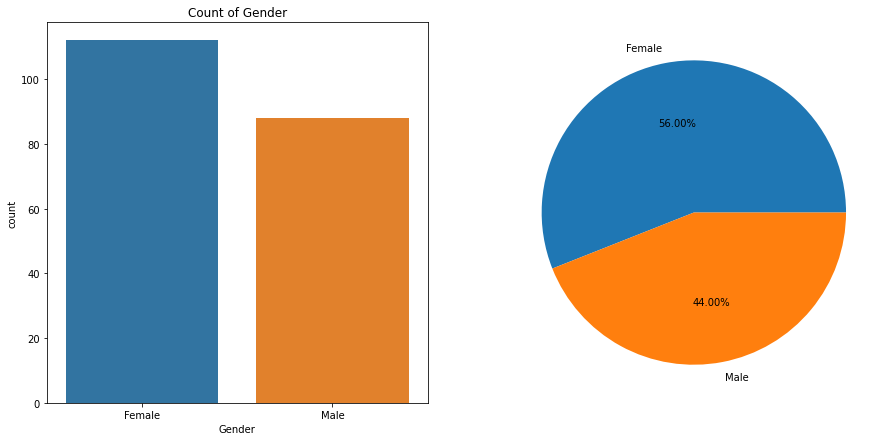

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of Gender")                  # Set the title of the graph
percentage = df["Gender"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["Gender"].value_counts().index) # Converting the index of value counts into list

sb.countplot(x = df["Gender"], ax = ax[0],order=['Female','Male'])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

Interpretation:

From the counterplot and pie chart we can make out that about 56% customers are females as compared to males who do shopping in the mall.



Univariate Analysis on numerical columns

In [ ]:
def info_of_numerical(col):
    print(f"The mean of the {col} is {df[col].mean()}")
    print(f"The median of the {col} is {df[col].median()}")
    print(f"The mode of the {col} is {df[col].mode()[0]}")
    print(f"The standard deviation of the {col} is {df[col].std()}")
    print(f"Number of missing values in the {col} is {df[col].isnull().sum()}")

Analysis on CustomerID  

In [ ]:
info_of_numerical("CustomerID")

The mean of the CustomerID is 100.5
The median of the CustomerID is 100.5
The mode of the CustomerID is 1
The standard deviation of the CustomerID is 57.879184513951124
Number of missing values in the CustomerID is 0


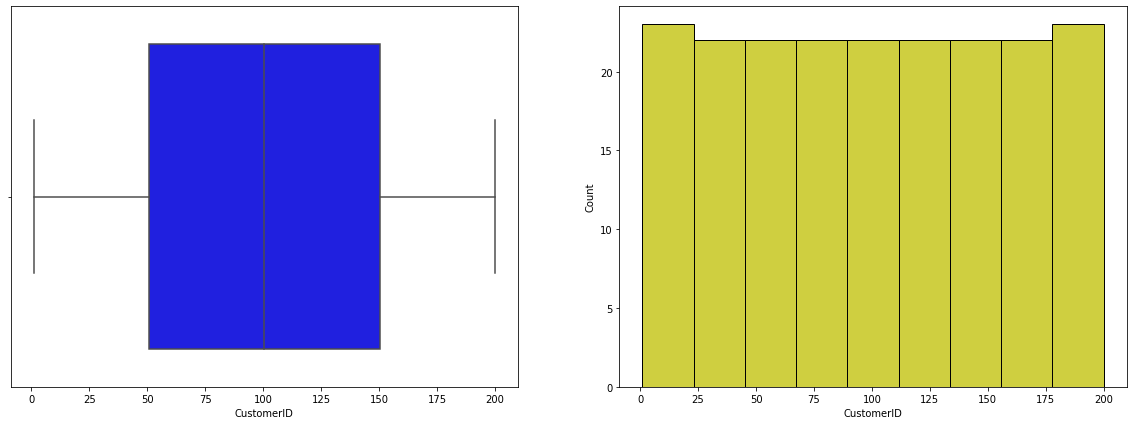

In [ ]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sb.histplot(x = df["CustomerID"], ax =ax[1], color = "y") # ax[1] means image will plot at the second space
sb.boxplot(x = df["CustomerID"], ax = ax[0], color = "b") # ax[0] means image will plot at the first space
plt.show()

Interpretation:

From the box plot and hist plot we can make out that there are about on an average 100 customers visiting the mall everyday.

Analysis on Age

In [ ]:
info_of_numerical("Age")

The mean of the Age is 38.85
The median of the Age is 36.0
The mode of the Age is 32
The standard deviation of the Age is 13.96900733155888
Number of missing values in the Age is 0


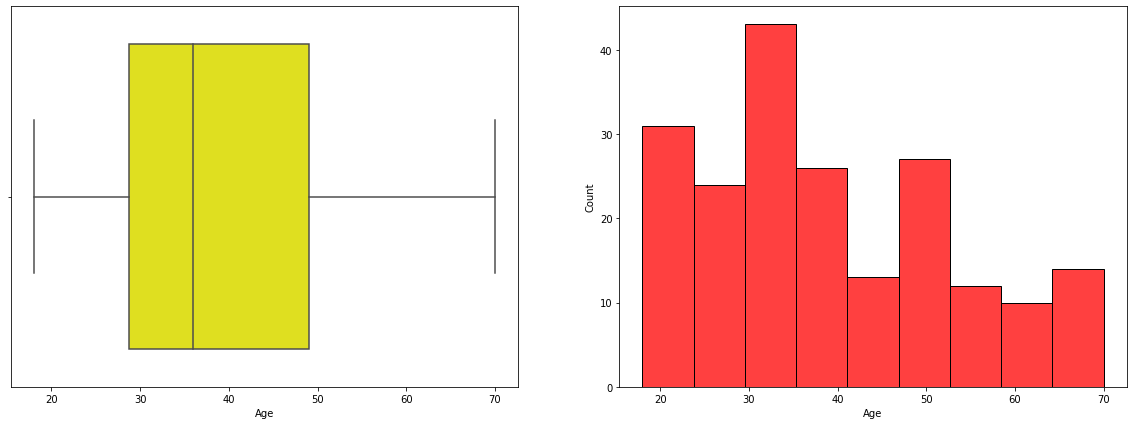

In [ ]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sb.histplot(x = df["Age"], ax =ax[1], color = "r") # ax[1] means image will plot at the second space
sb.boxplot(x = df["Age"], ax = ax[0], color = "yellow") # ax[0] means image will plot at the first space
plt.show()

Interpretation:

From the countplot and box plot we can make out that there are more number of customers in the age group of 30-40 who do shopping as compared to the customers of other age groups.



Analysis of Annual Income (k$) 

In [ ]:
info_of_numerical("Annual Income (k$)")

The mean of the Annual Income (k$) is 60.56
The median of the Annual Income (k$) is 61.5
The mode of the Annual Income (k$) is 54
The standard deviation of the Annual Income (k$) is 26.264721165271244
Number of missing values in the Annual Income (k$) is 0


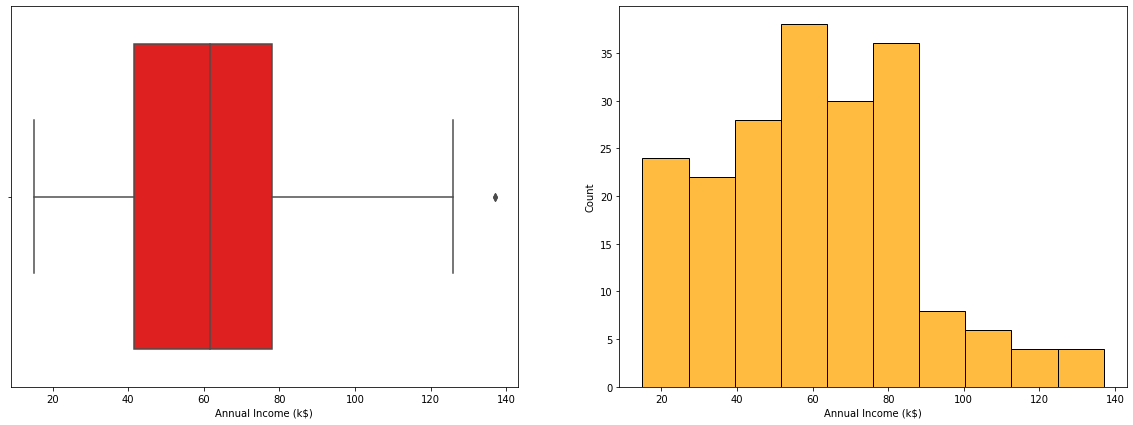

In [ ]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sb.histplot(x = df["Annual Income (k$)"], ax =ax[1], color = "orange") # ax[1] means image will plot at the second space
sb.boxplot(x = df["Annual Income (k$)"], ax = ax[0], color = "red") # ax[0] means image will plot at the first space
plt.show()

Interpretation:

From the box plot and count plot we can make out that there are more nuumber of customers whose income range is between 60(k$)  to  80(k$).

we can also notice that there is outlier present in the box plot that is there are 5 customers whose income ranges between 120(k$)  to  140(k$) 

Analysis on Spending Score (1-100)

In [ ]:
info_of_numerical("Spending Score (1-100)")

The mean of the Spending Score (1-100) is 50.2
The median of the Spending Score (1-100) is 50.0
The mode of the Spending Score (1-100) is 42
The standard deviation of the Spending Score (1-100) is 25.823521668370173
Number of missing values in the Spending Score (1-100) is 0


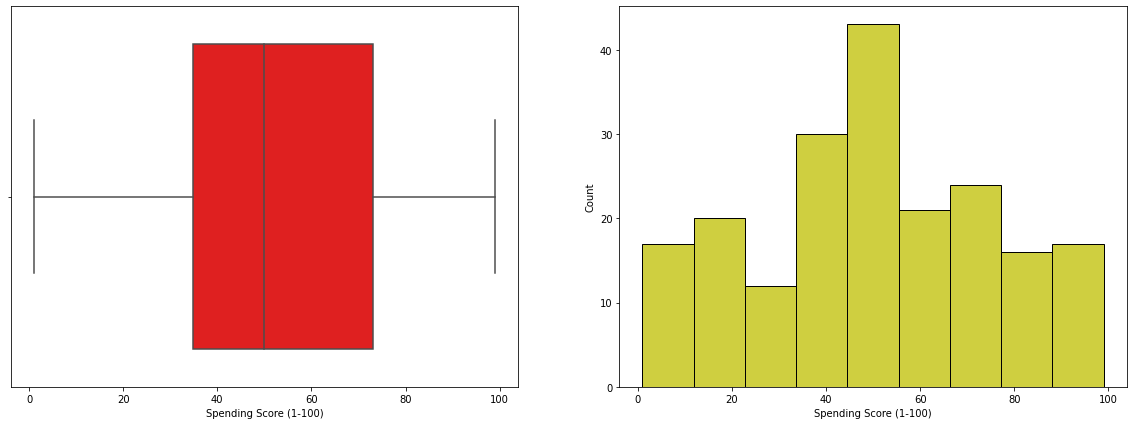

In [ ]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sb.histplot(x = df["Spending Score (1-100)"], ax =ax[1], color = "y") # ax[1] means image will plot at the second space
sb.boxplot(x = df["Spending Score (1-100)"], ax = ax[0], color = "r") # ax[0] means image will plot at the first space
plt.show()

Interpretation:

From the box plot we can make out that there are more number of customers whose shopping score ranges 40 to 60.

Therefore we can say that the customers whose shopping score ranges between 40 to 60 are regular customers who like to do shopping

Bivariate analysis

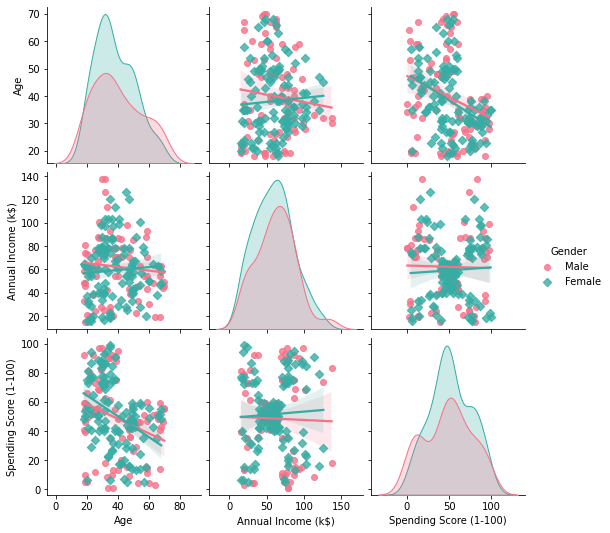

In [ ]:
sb.pairplot(df, vars=["Age", "Annual Income (k$)", "Spending Score (1-100)"],  kind ="reg", hue = "Gender", palette="husl", markers = ['o','D'])

Interpretation:

In this pairplot graphic we can clearly observe the relation between the different variables we have in our dataset and we will explain this relation better in the following section.

Having said that it's interesting to take a look at the diagonal of this pairplot where we can see the same histograms we've studied before, but this time making a differentiation between women and man, for each value of each variable we can now see the proportion between men and women and, as we can observe, the Green colour can be found in a higher ratio than the blue one, since there are more women than men

Age and Annual Income

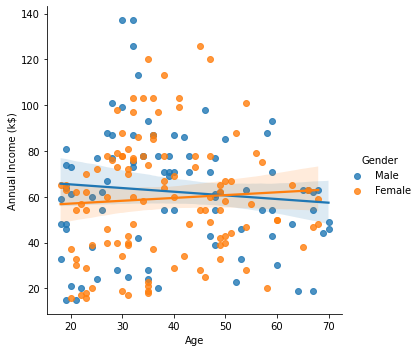

In [ ]:
sb.lmplot(x = "Age", y = "Annual Income (k$)", data = df, hue = "Gender")

Interpretation:

In this graph we can clearly see how people in their thirties, forties and fifthies tend to earn more money annually than the ones younger than thirty or older than fifty years old.

That is to say people whose age lays between thirty and fifty years old seem to get better jobs since they might be better prepared or be already more experienced than younglings or older people.

In the graph we can also see how males tend to earn a little bit more money than females, at least until fifty years old.

Spending Score and Annual Income

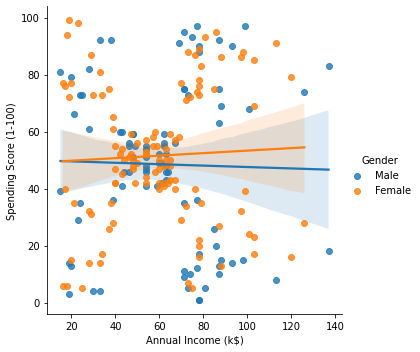

In [ ]:
sb.lmplot(x = "Annual Income (k$)", y = "Spending Score (1-100)", data = df, hue = "Gender")

Interpretation:

Here we can observe how a better annual income leads to having a higher spending score, specially for women.

However the correlation between these two variables isn't that big, we seem to find the majority of people in the middle, people who have decent salaries and have a reasonably high spending score.

Age and Spending Score

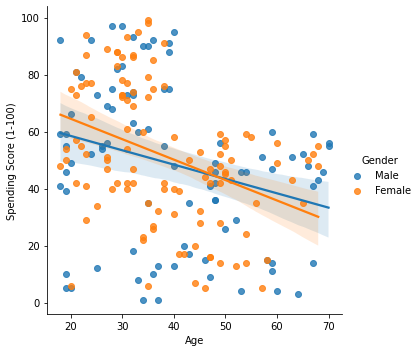

In [ ]:
sb.lmplot(x = "Age", y = "Spending Score (1-100)", data = df, hue = "Gender")

Interpretation:

In this graph we can predict that, young people tend to spend way more than older people.

That can be due to many reasons: young people usually have more free time than old people, shopping malls tend to have shops that target young people such as videogames and tech stores, etc.

Feature Engineering

Converting non-numeric(object) to category

In [ ]:
df['Gender']=df['Gender'].astype('category')

In [ ]:
df.dtypes

CustomerID                   int64
Gender                    category
Age                          int64
Annual Income (k$)           int64
Spending Score (1-100)       int64
dtype: object

Convertng category label to numeric label using label encoder

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df['Gender']=label_encoder.fit_transform(df['Gender'])

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
col=['CustomerID','Gender','Age','Annual Income (k$)','Spending Score (1-100)']
df[col] = MinMaxScaler().fit_transform(df[col])
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0.000000,1.0,0.019231,0.000000,0.387755
1,0.005025,1.0,0.057692,0.000000,0.816327
2,0.010050,0.0,0.038462,0.008197,0.051020
3,0.015075,0.0,0.096154,0.008197,0.775510
4,0.020101,0.0,0.250000,0.016393,0.397959
...,...,...,...,...,...
195,0.979899,0.0,0.326923,0.860656,0.795918
196,0.984925,0.0,0.519231,0.909836,0.275510
197,0.989950,1.0,0.269231,0.909836,0.744898
198,0.994975,1.0,0.269231,1.000000,0.173469


Find a good K for the model using a for loop and score and train this model.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
x=df.drop(columns=['CustomerID','Gender','Age'],axis=1).values

Find the k value using elbow method

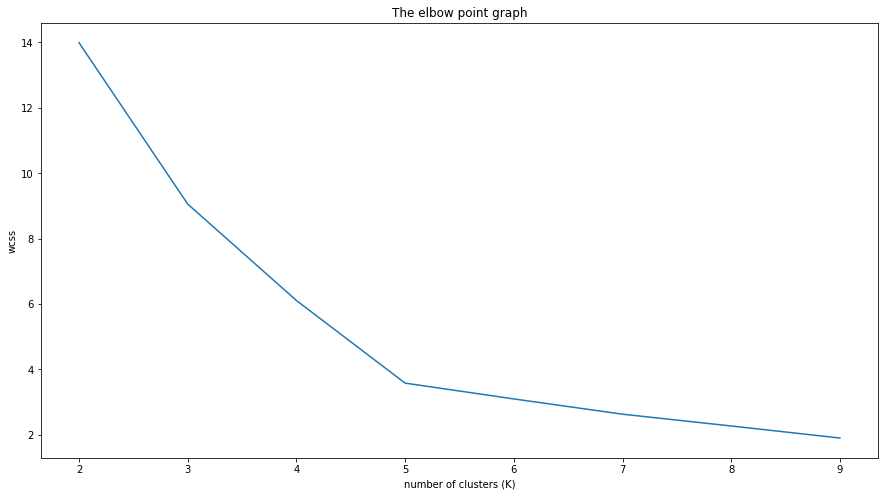

In [ ]:
wcss=[] 
for i in range(2,10):
    kmeans = KMeans(n_clusters=i, init = 'k-means++',random_state = 2)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,8))
plt.plot(range(2,10), wcss)
plt.title("The elbow point graph") 
plt.xlabel('number of clusters (K)')
plt.ylabel('wcss')
plt.show()   


wcss dosen't reduce much after k=5.So, we can choose 5 as the perfect k value or Clusters

Silhouette score to validate the cluster

For n_clusters = 2 The average silhouette_score is : 0.33340205479521
For n_clusters = 3 The average silhouette_score is : 0.4514909309424474
For n_clusters = 4 The average silhouette_score is : 0.49620078745146784
For n_clusters = 5 The average silhouette_score is : 0.5594854531227246
For n_clusters = 6 The average silhouette_score is : 0.5354954062577636
For n_clusters = 7 The average silhouette_score is : 0.5168021892187427


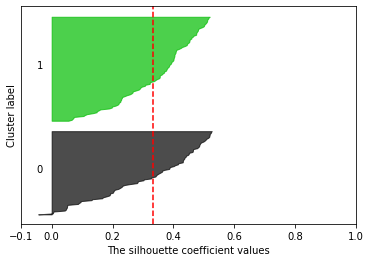

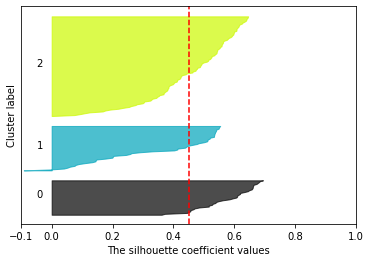

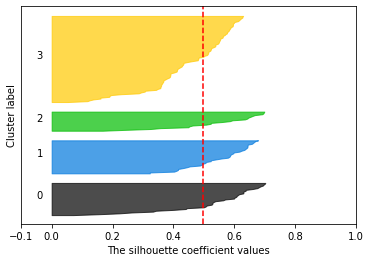

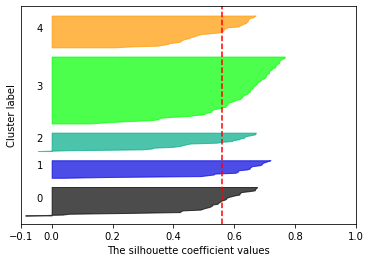

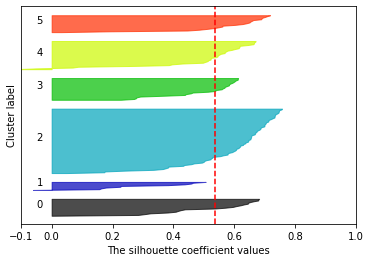

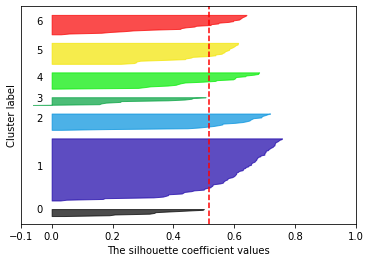

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4, 5, 6, 7]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x)

    silhouette_avg = silhouette_score(x, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

Training K-means algorithm on the training dataset

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++',random_state=0)
y=kmeans.fit_predict(x)

Centroid points

In [ ]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

Interpretation

As we can observe, the K-means algorithm has already finished its work and now it's time to plot the results we obtained by it so we can visualize the different clusters and analyze them.

In [ ]:
#Create a 3d plot to view the data sepparation made by Kmeans
'''trace1 = go.Scatter3d(
    x= x['Spending Score (1-100)'],
    y= x['Annual Income (k$)'],
    z= x['Age'],
    mode='markers',
     marker=dict(
        color = labels, 
        size= 10,
        line=dict(
            color= labels,
        ),
        opacity = 0.9
     )
)
layout = go.Layout(
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Spending_score'),
            yaxis = dict(title  = 'Annual_income'),
            zaxis = dict(title  = 'Age')
        )
)
fig = go.Figure(data=trace1, layout=layout)
py.offline.iplot(fig)'''

"trace1 = go.Scatter3d(\n    x= x['Spending Score (1-100)'],\n    y= x['Annual Income (k$)'],\n    z= x['Age'],\n    mode='markers',\n     marker=dict(\n        color = labels, \n        size= 10,\n        line=dict(\n            color= labels,\n        ),\n        opacity = 0.9\n     )\n)\nlayout = go.Layout(\n    title= 'Clusters',\n    scene = dict(\n            xaxis = dict(title  = 'Spending_score'),\n            yaxis = dict(title  = 'Annual_income'),\n            zaxis = dict(title  = 'Age')\n        )\n)\nfig = go.Figure(data=trace1, layout=layout)\npy.offline.iplot(fig)"

In [ ]:
labels_5 = kmeans.labels_
labels_5

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

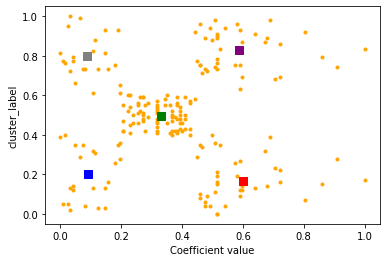

In [ ]:
centroid_colors=['red','green','purple','gray','blue']
c=0
plt.scatter(x[ : , 0], x[ : , 1], marker='.', c='orange')
for i,j in kmeans.cluster_centers_:
  plt.scatter(i, j, s=50, c=centroid_colors[c], marker='s')
  c=c+1
plt.xlabel("Coefficient value")  
plt.ylabel("cluster_label")  
plt.show()

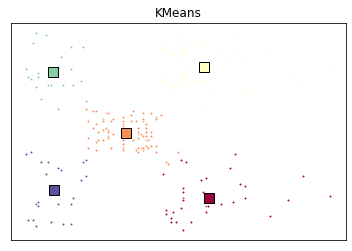

In [ ]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(labels_5))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,5], [0, -1], [2, -3], [1, 2], [5,2]])), colors):

    # Create a list of all data points, where the data poitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (labels_5 == k)
    
    # Define the centroid, or cluster center.
    cluster_centroid = centroids[k]
    
    # Plots the datapoints with color col.
    ax.plot(x[my_members, 0], x[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_centroid[0], cluster_centroid[1], marker='s', markerfacecolor=col,  markeredgecolor='k', markersize=10)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()
